# Week 1 BodyFat Dataset Implementation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import warnings
warnings.filterwarnings('ignore')

2024-07-25 16:00:49.789665: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 16:00:49.818853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-25 16:00:50.251285: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df=pd.read_csv('bodyfat.csv')
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

### Preprocessing the dataset

In [3]:
df.shape

(252, 15)

In [4]:
df['BodyFat_new']=df['BodyFat']

In [5]:
df.drop(columns=['BodyFat'],inplace=True,axis=0)

In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=42)

In [7]:
X_train

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
186   1.0453   41  232.75   74.25  41.9  117.5    109.3  108.8   67.7  41.3   
219   1.0646   53  154.50   69.25  37.6   93.9     88.7   94.5   53.7  36.2   
10    1.0830   26  186.25   74.50  38.5  101.5     83.6   98.2   59.7  39.7   
162   1.0690   33  184.25   68.75  40.7   98.9     92.1  103.5   64.0  37.3   
140   1.0422   40  176.75   71.00  37.4   98.6     93.1  101.6   59.1  39.6   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
106   1.0547   43  200.25   73.50  38.6  105.2    102.8  103.6   61.2  39.3   
14    1.0484   35  187.75   69.50  40.5  101.3     96.4  100.1   69.0  39.0   
92    1.0795   47  165.25   70.50  37.5   97.2     83.1   95.4   56.9  38.3   
179   1.0603   39  234.75   74.50  42.8  109.5    104.5  109.9   69.5  43.1   
102   1.0530   41  172.75   71.25  36.3   96.7     89.2   98.3   60.0  38.4   

     Ankle  Biceps  Forearm  Wrist  
186   24.7    37.2     31.8   20.0  
219   22.0    28.5     25.7   17.1  
10    25.2    32.8     29.4   18.5  
162   23.5    33.5     30.6   19.7  
140   21.6    30.8     27.9   16.6  
..     ...     ...      ...    ...  
106   23.5    30.5     28.5   18.1  
14    23.1    36.1     30.5   18.2  
92    22.1    30.1     28.2   18.4  
179   25.8    39.1     32.5   19.9  
102   23.2    31.0     29.2   18.4  

[226 rows x 14 columns]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Implementation

In [9]:
#defining the model
num_features = df.shape[1]-1
model = Sequential([
    Input(shape=(num_features,),name='input'),#the shape is (10,) to represent the vector format
    Dense(128, activation='relu',name='d1'),
    Dense(64, activation='relu',name='d2'),
    Dense(32, activation='relu',name='d3'), 
    Dense(1)#as Regression so no activation in the output layer  
])

2024-07-25 16:00:50.759840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-25 16:00:50.784103: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-25 16:00:50.784268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 d1 (Dense)                  (None, 128)               1920      
                                                                 
 d2 (Dense)                  (None, 64)                8256      
                                                                 
 d3 (Dense)                  (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)#setting up the Learning Rate 
model.compile(optimizer=optimizer, loss='mean_squared_error')#regression so mean_squared_error

In [12]:
epochs = 20
batch_size = 32
onj=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20


2024-07-25 16:00:51.936803: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f84ec01a3d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-25 16:00:51.936828: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-07-25 16:00:51.940668: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-25 16:00:52.031886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-07-25 16:00:52.103344: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 [==============================] - 1s 16ms/step - loss: 291.0437 - val_loss: 215.7368
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 121.5884 - val_loss: 85.7752
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 56.4335 - val_loss: 29.1013
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 24.9815 - val_loss: 29.0906
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 17.1589 - val_loss: 21.0185
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 11.9759 - val_loss: 6.6110
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 7.7469 - val_loss: 6.1585
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 5.5594 - val_loss: 4.2621
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 4.8953 - val_loss: 4.1984
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 3.3281 - val_loss: 3.0856
Epoch 11/20
7/7 [==================

In [13]:
loss = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Loss:", loss)

1/1 [==============================] - 0s 13ms/step - loss: 2.5788
Test Loss: 2.578793525695801


### Plotting the Result

In [14]:
rmse = np.sqrt(onj.history['loss'])
rmse

array([17.06000386, 11.02671448,  7.51222555,  4.99815239,  4.14233156,
        3.46061729,  2.78332768,  2.35784489,  2.21253354,  1.82431644,
        1.61701788,  1.52463332,  1.40197592,  1.29380209,  1.18991761,
        1.09602278,  1.07652379,  1.0341741 ,  0.98707111,  0.95795166])

In [16]:
pd.DataFrame({"epochs": range(1, epochs + 1), "rmse": rmse})

epochs       rmse
0        1  17.060004
1        2  11.026714
2        3   7.512226
3        4   4.998152
4        5   4.142332
5        6   3.460617
6        7   2.783328
7        8   2.357845
8        9   2.212534
9       10   1.824316
10      11   1.617018
11      12   1.524633
12      13   1.401976
13      14   1.293802
14      15   1.189918
15      16   1.096023
16      17   1.076524
17      18   1.034174
18      19   0.987071
19      20   0.957952

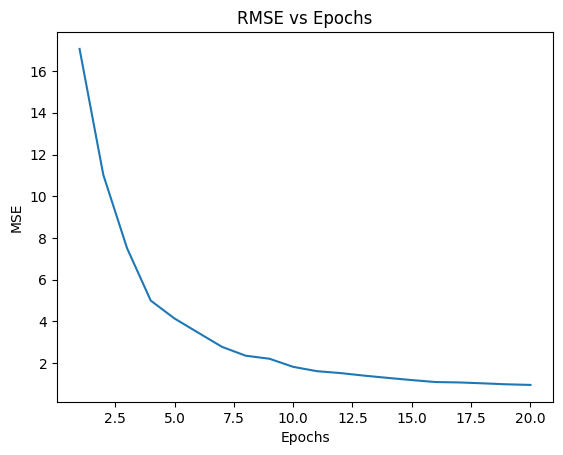

In [18]:
# For all losses
fig = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("RMSE vs Epochs")
plt.plot(range(1, epochs + 1), rmse)

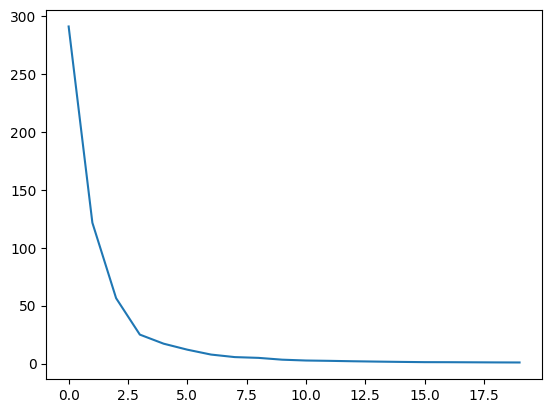

In [15]:
import matplotlib.pyplot as plt
plt.plot(onj.history['loss'])